# Homework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problems [Part 1](./01_Revisiting_derivatives.md)

1. Consider the shape of a simply supported beam with a distributed load function,

$w(x) = -\frac{qx\left(L^3-2x^2L+x^3\right)}{24EI},$

* $L=1~m$
* $E=200e9~Pa$
* $I=\frac{0.01^4}{12}~m^4$
* $q=100~N/m$

__Plot the following derivatives using h=0.1m, x=0, 0.1, 0.2, ...1 m:__

a. Take the first derivative of the above function using a forward, backward, and central difference method

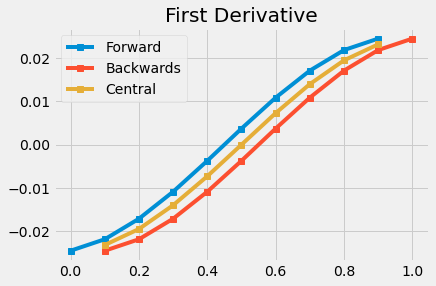

In [2]:
# 1A
L = 1
E = 200e9
I = 0.01**4/12
q = 100
w = lambda x: -q*x*(L**3 - 2*L*x**2 + x**3)/24/E/I

x = np.arange(0,11)*0.1

plt.plot(x[:-1], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Forward')
plt.plot(x[1:], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Backwards')
plt.plot(x[1:-1], (w(x[2:]) - w(x[0:-2]))/0.2, 's-', label = 'Central')
plt.legend(loc='best')
plt.title('First Derivative');

b. Take the second derivative of the above function using a forward, backward, and central difference method

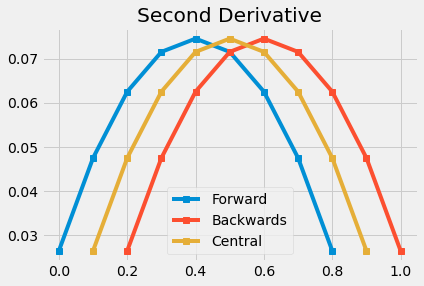

In [3]:
# 1.1b
plt.plot(x[:-2], ( w(x[2:]) - 2*w(x[1:-1]) + w(x[:-2]))/0.1**2, 's-', label = 'Forward')
plt.plot(x[2:], (w(x[2:]) - 2*w(x[1:-1]) + w(x[:-2]))/0.1**2, 's-', label='Backwards')
plt.plot(x[1:-1], ( w(x[2:]) - 2*w(x[1:-1]) + w(x[:-2])) / 0.1**2, 's-', label = 'Central') #Correct 
plt.legend(loc='best')
plt.title('Second Derivative');

c. Take the third derivative of the above function using a forward, backward, and central difference method

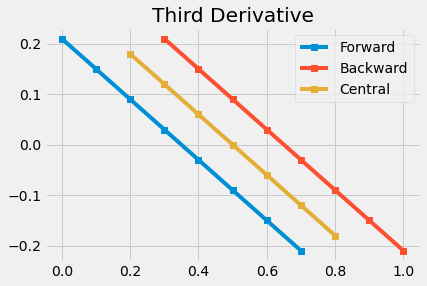

In [4]:
# 1.1c
plt.plot(x[:-3], (w(x[3:]) - 3*w(x[2:-1]) + 3*w(x[1:-2]) - w(x[:-3]))/0.1**3, 's-', label='Forward')
plt.plot(x[3:], (w(x[3:]) - 3*w(x[2:-1]) + 3*w(x[1:-2]) - w(x[:-3]))/0.1**3, 's-', label='Backward')
plt.plot(x[2:-2], (w(x[4:]) - 2*w(x[3:-1]) + 2*w(x[1:-3]) - w(x[:-4]))/(2*0.1**3), 's-', label='Central')
plt.legend(loc='best')
plt.title('Third Derivative');

2. Consider the temperature of a fin with conductive and convective heat transfer [analytical solution](https://en.wikipedia.org/wiki/Fin_(extended_surface)#Solutions) with x=0...60 mm connected to a $100^oC$ base surrounded by $20^oC$ air. 

$T(x)=20+80\frac{\cosh(s(L-x))+\frac{h}{sk}\sinh(s(L-x))}{\cosh(sL)+\frac{h}{sk}\sinh(sL)}$

* $s=\sqrt{\frac{2h}{kR}}$
* h=100 W/m/m/K
* k=200 W/m/K
* R=1E-3 radius in m
* L=60E-3  length in m


__Plot the first derivative of $T(x)$ using h=10 mm, x=0, 10, 20, ...60 mm (values given below):__

using the forward, backward, and central difference methods.

In [5]:
h=100 # W/m/m/K
k=200 # W/m/K
R=1E-3# radius in m
L=60E-3# length in m
s=np.sqrt(2*h/k/R)
x=np.arange(0,70,10)*1e-3 # m
T= 20+80*(np.cosh(s*L-s*x)+h/s/k*np.sinh(s*L-s*x))/(np.cosh(s*L)+h/s/k*np.sinh(s*L))

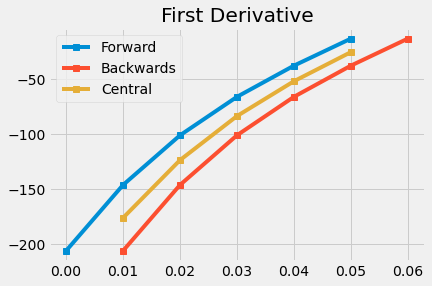

In [6]:
# 1.2
w = lambda x: 20+80*(np.cosh(s*L-s*x)+h/s/k*np.sinh(s*L-s*x))/(np.cosh(s*L)+h/s/k*np.sinh(s*L))

plt.plot(x[:-1], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Forward')
plt.plot(x[1:], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Backwards')
plt.plot(x[1:-1], (w(x[2:]) - w(x[0:-2]))/0.2, 's-', label = 'Central')
plt.legend(loc='best')
plt.title('First Derivative');

## Problems [Part 2](./02_Keep_it_steady.md)

![Thermal fin connected to a constant temperature heat sink](../images/thermal_connect.png)

1. Consider the thermal fin shown above connected to a heat sink with constant temperature. $h'=\frac{2h}{\kappa R}$ is the modified convective heat transfer for the fin. And your boundary conditions give us values for $T_{0}~and~T_{7}.$ You can plug in constants for forced air convection, $h=100~W/m^2K$, aluminum fin, $\kappa=200~W/mK$, and 60-mm-long and 1-mm-radius fin, the air is room temperature, $T_{\infty}=20^oC$, the base is $T_{base}=T_{0}=100^oC$, and the sink is $T_{sink}=25^oC$. Use the following finite difference equation to solve for the temperature along the fin and the heat flux through the fin given, 

$T(x=0)=100^oC,~and$

$T(x=60~mm)=25^oC.$

$\frac{T_{i-1}-2T_i+T_{i+1}}{\Delta x^2}+ h'(T_{\infty}-T_i) = 0$

a. Set up and solve the finite difference equations for $\Delta x=10~mm$, plot the resulting temperature $T(x)$. 

b. Set up and solve the finite difference equations for $\Delta x=5~mm$, plot the resulting temperature $T(x)$. 

c. Set up and solve the finite difference equations for $\Delta x=1~mm$, plot the resulting temperature $T(x)$. 

d. Plot the heat flux through the fin, $-\kappa \frac{dT}{dx}$.

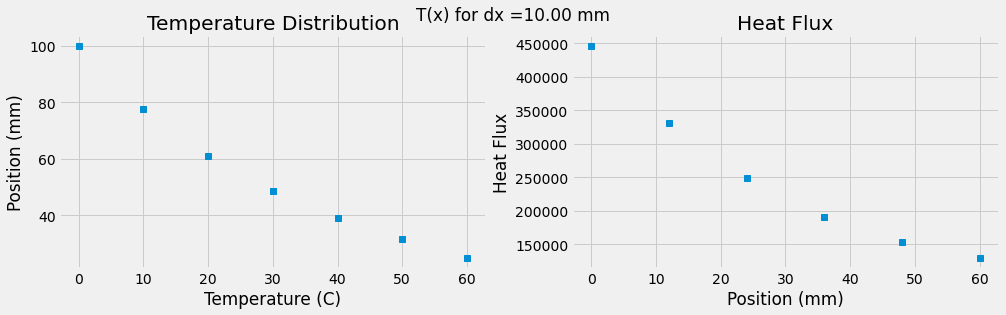

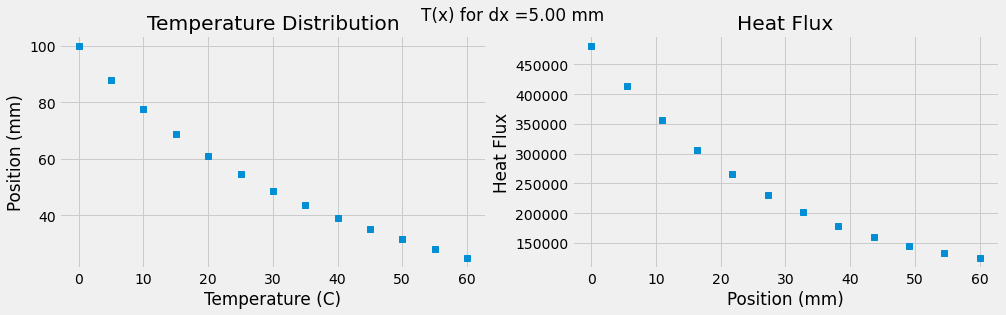

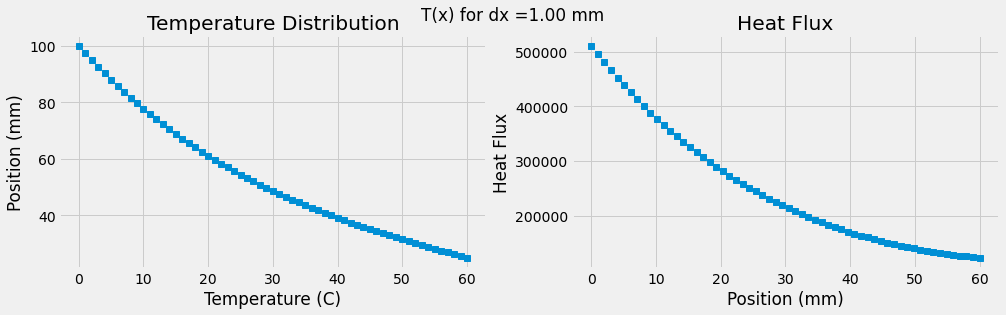

In [7]:
# 2.1a,b,c,d
N = np.array([5, 11, 59])

hp = 200/200/1e-3
for i in range(len(N)):
    dx = 0.06/(N[i]+1)
    K = (2+dx**2*hp) * np.diag(np.ones(N[i])) + -1*np.diag(np.ones(N[i]-1), 1) + -1*np.diag(np.ones(N[i]-1), -1)

    rhs = np.ones(N[i])*hp*dx**2*20
    rhs[0] += 100
    rhs[-1] += 25

    T = np.linalg.solve(K, rhs)

    T_bc = np.zeros(N[i]+2)
    T_bc[0] = 100
    T_bc[-1] = 25
    T_bc[1:-1] = T
    
    dtdx = np.diff(T_bc)/dx
    q = -k*dtdx
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('T(x) for dx ={:2.2f} mm'.format(dx*1000))
    fig.set_figwidth(15)
    
    ax1.plot(np.linspace(0,60, N[i]+2), T_bc, 's')
    ax1.set_title('Temperature Distribution')
    ax1.set(xlabel='Temperature (C)', ylabel='Position (mm)')
    
    
    ax2.plot(np.linspace(0,60, N[i]+1), q,'s')
    ax2.set_title('Heat Flux')
    ax2.set(ylabel='Heat Flux', xlabel='Position (mm)')
    
    
#     plt.figure(i)
#     plt.plot(np.linspace(0,60, N[i]+2), T_bc, 's')
#     plt.title('T(x) for dx ={:2.2f} mm'.format(dx*1000))
#     plt.xlabel('Position (mm)')
#     plt.ylabel('Temperature (C)');

2. Consider the encastre beam shown in the __Static Beam deflections__ section. Use the following material and geometry (1-m steel rod 1-cm-by-1-cm) with 100 N/m load applied

$EI \frac{d^4w}{dx^4} = q.$

You can approximate the function as a finite difference approximation as such,

$\frac{d^4w}{dx^4} \approx \frac{w(x_{i+2})−4w(x_{i+1})+6w(x_i)−4w(x_{i-1})+w(x_{i-2})}{h^4}=\frac{q}{EI}.$

* $L=1~m$
* $E=200e9~Pa$
* $I=\frac{0.01^4}{12}~m^4$
* $q=100~N/m$

a. Solve for the four integration constants using the boundary conditions shown in the __Static Beam deflections__ section. $w(x)=\frac{q_0x^4}{24}+\frac{Ax^3}{6}+\frac{Bx^2}{2}+Cx+D$

b. Create a finite difference approximation with 10, 20, 30, and 40 segments. 

c. Plot the error between the maximum predicted numerical deflection (b) and the analytical deflection (a). What is the convergence rate of the finite difference approximation?

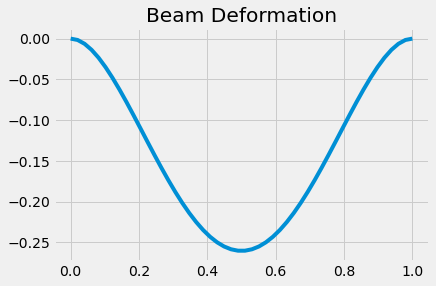

In [8]:
# 2.2a
L = 1 
E = 200e9
I = 0.01**4/12
q = 100

x = np.linspace(0,1)

lhs = np.array([[L**3 /6, L**2 /2],
               [L**2 /2, L]])
rhs = np.array([-q*L**4 /24, -q*L**3 /6])

AB = np.linalg.solve(lhs,rhs)

w = lambda x: 100*x**4/24 + AB[0]*x**3 /6 + AB[1]*x**2 /2

plt.plot(x,-w(x))
plt.title('Beam Deformation');

## Problems [Part 3](./03_Good_Vibrations.md)

![Two masses connected to 3 springs](../images/spring_mass.png)

*Two masses connected to 3 springs*

1. Use the 2-DOF harmonic oscillator shown considering $m_1=m_2=0.1~kg$, $k_1=k_3=1000~N/m,$ and $k_2=500~N/m$. 

a. Calculate the natural frequencies and mode shapes _(eigenvectors)_.

b. Plot the position of $x_1~and~x_2$ if the masses are at rest when mass 2 is given an initial velocity of 2 m/s.

In [9]:
# 3.1a

m1=m2=0.1 # 0.2 kg
k1=k3=1000 # 500 N/m
k2 = 500

M=np.array([[m1,0],[0,m2]])
K=np.array([[k1+k2,-k2],[-k2,k2+k3]])

from scipy import linalg
e,v=linalg.eig(K,M)

print('eigenvalue 1:,\t eigenvector 1:\n',e[0],'\t',v[:,0]/v[0,0])
print('----------------------')
print('eigenvalue 2:,\t eigenvector 2:\n',e[1],'\t',v[:,1]/v[1,0])

w1=np.sqrt(e[0].real)/2/np.pi
v1=v[:,0]/max(v[:,0])

w2=np.sqrt(e[1].real)/2/np.pi
v2=v[:,1]/max(v[:,1])
print('1st natural frequency is %1.2f Hz, \
     mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w1,v1[0],v1[1]))
print('2nd natural frequency is %1.2f Hz, \
    mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w2,v2[0],v2[1]))

eigenvalue 1:,	 eigenvector 1:
 (10000+0j) 	 [1. 1.]
----------------------
eigenvalue 2:,	 eigenvector 2:
 (20000+0j) 	 [-1.  1.]
1st natural frequency is 15.92 Hz,      mode shape: 1*x1(t)=1*x2(t)
2nd natural frequency is 22.51 Hz,     mode shape: -1*x1(t)=1*x2(t)


In [10]:
# 3.1b
def spring_mass(state,k1=1000,k2=500,k3=1000,m1=0.1,m2=0.1):
    ''' Define right-hand-side of 2-DOF spring-mass system
    |                      |
    |--\/--m1--\/--m2--\/--|
    |  k1      k2      k3  |
    |                      |
    Arguments
    ---------
    state : array of dependent variables (x1,x2,v1,v2)
    k1 : stiffness in first spring
    k2 : stiffness in second spring
    k3 : stiffness in third spring
    m1 : mass of first mass
    m2 : mass of second mass
    
    Returns
    -------
    dstate : the derivative of the state, (v1,v2,a1,a2)
    
    '''
    A=np.zeros((len(state),len(state)))
    A[0:2,2:4]=np.eye(2)
    A[2:4,0:2]=np.array([[-(k1+k2)/m1,k2/m1],[k2/m2,-(k2+k3)/m2]])
    dstate = A@state
    return dstate

In [11]:
def heun_step(state,rhs,dt,etol=0.000001,maxiters = 100):
    '''Update a state to the next time increment using the implicit Heun's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    etol  : tolerance in error for each time step corrector
    maxiters: maximum number of iterations each time step can take
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    e=1
    eps=np.finfo('float64').eps
    next_state = state + rhs(state)*dt
    ################### New iterative correction #########################
    for n in range(0,maxiters):
        next_state_old = next_state
        next_state = state + (rhs(state)+rhs(next_state))/2*dt
        e=np.sum(np.abs(next_state-next_state_old)/np.abs(next_state+eps))
        if e<etol:
            break
    ############### end of iterative correction #########################
    return next_state

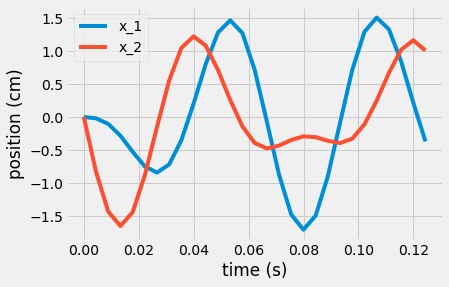

In [12]:
T=2*1/w1 # 2 x longest period
dt=1/w2/10 # shortest period
t=np.arange(0,T,dt)
state=np.zeros((4,len(t)))
state[:,0]=np.array([0,0,0,-2]) # set initial conditions
for i in range(0,len(t)-1):
    state[:,i+1]=heun_step(state[:,i],spring_mass,dt)
    
plt.plot(t,state[0,:]*100,label='x_1')
plt.plot(t,state[1,:]*100,label='x_2')
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.legend();

2. Consider the G-string on the guitar, L=0.64 m, $\mu=1.14~g/m,$ and T=71.81 N [1]. 

__Guitar string equation:__ $\mu\frac{\partial^2 y}{\partial t^2}=T\frac{\partial ^2 y}{\partial x^2}$

a. Calculate the first and second natural frequencies using 6, 30, 45, and 60 nodes. Plot the mode shapes to demonstrate convergence.


First 2 natural frequencies of  6-element string (Hz):
[194.43708661 379.1242858 ]

First 2 natural frequencies of 30-element string (Hz):
[195.99464595 391.48617646]

First 2 natural frequencies of 45-element string (Hz):
[196.04043699 391.85229959]

First 2 natural frequencies of 60-element string (Hz):
[196.05687232 391.9837462 ]


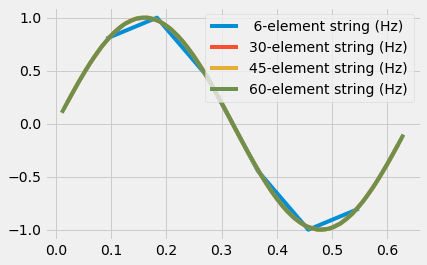

In [13]:
# 3.2a
L=0.64 # 64-cm guitar string
T=71.81 # 9kg*9.81 m/s/s # N
mu=1.14e-3 # kg/m

N= np.array([6,30,45,60]) # 6-node guitar string

for i in range(len(N)):
    dx=L/(N[i]+1)

    k = T/dx**2/mu

    A = k*(np.diag(np.ones(N[i])*2)\
           -np.diag(np.ones(N[i]-1),-1)\
           -np.diag(np.ones(N[i]-1),1))
#     print('K=T/mu/h^2*')
#     print(A/k)

    e,v=linalg.eig(A)
    isort = np.argsort(e.real)
    e=e[isort]
    v=v[:,isort]
    
    if N[i]==6: v[:,1]= -v[:,1]
    if N[i]==45: v[:,1]= -v[:,1]
    
    plt.plot(np.linspace(dx, L-dx, N[i]), (v[:,1])/np.max(v[:,1]), label='{:2.0f}-element string (Hz)'.format(N[i]))
    plt.legend(loc='best')
    
    NF = e.real**0.5/2/np.pi
    print('\nFirst 2 natural frequencies of {:2.0f}-element string (Hz):'.format(N[i]))
    print(NF[0:2])

b. Use 60 nodes to create an animation using the following initial condition, $y(x,0)=0$ and $\dot{y}(L/2,0)=2~m/s.$ e.g. `dy[30,0]=2`.

In [23]:
# 3.2b
from matplotlib import animation
from IPython.display import HTML
from scipy import linalg

N=60

L=0.64 # 64-cm guitar string
T=88.29 # 9kg*9.81 m/s/s # N
mu=4.5e-3 # kg/m

def wave_equation(state,T=T,mu=mu,dx=dx):
    '''General Finite Difference Wave Equation
    in a guitar string
    of the form T/mu*d^2y/dx^2=d^2y/dt^2
    Argumemts:
    ----------
    state: state of string [position,velocity]
    T: tension in string
    mu: string density in kg/m
    dx: central difference step size()
    Returns:
    ----------
    dstate: derivative of the state= [velocity,acceleration]
    '''
    k = T/dx**2/mu

    A = k*(np.diag(np.ones(N)*2)\
       -np.diag(np.ones(N-1),-1)\
       -np.diag(np.ones(N-1),1))
    N_s=len(state)
    dstate=np.zeros(len(state))
    dstate[0:int(N_s/2)]=state[int(N_s/2):]
    dstate[int(N_s/2):]=-A@state[0:int(N_s/2)]
    return dstate

First 10 Natural frequencies of 60-element string (Hz)
[ 196.05687232  391.9837462   587.65070938  782.92802196  977.6862024
 1171.79611336 1365.12904737 1557.55681212 1748.95181552 1939.18715022]

Longest time period =5.101 ms
shortest time period =0.131 ms


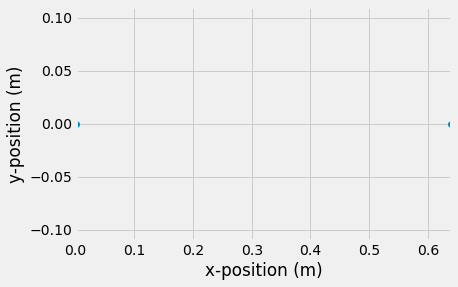

In [36]:
e,v=linalg.eig(A)
isort = np.argsort(e.real)
e=e.real[isort]
v=v.real[:,isort]

print('First 10 Natural frequencies of {}-element string (Hz)'.format(N))
print(e.real[:10]**0.5/2/np.pi)
f1=np.sqrt(e.real[0])/2/np.pi
fn=np.sqrt(e.real[-1])/2/np.pi
print('\nLongest time period ={:1.3f} ms\nshortest time period ={:1.3f} ms'.format(1/f1*1000,1/fn*1000))

T1 = 10/f1 
dt=1/fn/10
t=np.arange(0,T1,dt)
state=np.zeros((4,len(t)))
state[:,0]=np.array([0,0,0,-2]) # set initial conditions
tsteps=len(t)
x=np.linspace(0,L,N+2)
y=np.zeros((N,tsteps))
y[:,0]=0.1*x[1:-1]-0.2*(x[1:-1]-L/2)*(x[1:-1]>L/2)
dy=np.zeros((N,tsteps))
for i in range(0,tsteps-1):
    state = np.block([y[:,i],dy[:,i]]) # set z=[y,dy]
    next_state = heun_step(state,wave_equation,dt) # get next state
    y[:,i+1]=next_state[0:N] # save the postions
    dy[:,i+1]=next_state[N:] # save the velocities

ybcs = np.pad(y,((1,1),(0,0)))

fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-0.11, 0.11))
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')
ax.plot(x[[0,-1]],[0,0],'o')

line, = ax.plot([], [], lw=2)

In [32]:
def init():
    line.set_data([], [])
    return (line,)

In [26]:
def animate(i):
    line.set_data(x, ybcs[:,i])
    return (line,)

In [37]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,tsteps,10), interval=10, 
                               blit=True)
print('Animation of String from t=0-{:.1f} ms every {:.2f} ms'.format(t[-1]*1000,t[10]*1000))

Animation of String from t=0-51.0 ms every 0.13 ms


In [38]:
HTML(anim.to_html5_video())

c. Use 60 nodes to create an audio display using the following initial condition, $y(x,0)=0$ and $\dot{y}(L/2,0)=2~m/s.$ e.g. `dy[30,0]=2`.

In [39]:
from IPython.display import Audio

samplerate = 1/dt
samplerate = 400000
out_file=100*np.array([dy[0,:] for i in range(30)]).reshape(-1,)
Audio(data=out_file,rate=samplerate)

array([ 0.        ,  0.        ,  0.        , ...,  0.5061272 ,
        0.25719228, -0.01287958])